In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import plotly.graph_objects as go
import datetime as dt

In [2]:
class LinearRegression:
    
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # Numbers of features and samples
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descents
        for _ in range(self.epochs):
            # Predict
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Gradients Computation
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update Weights and Bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [3]:
data = pd.read_csv("../input/nifty50-stock-market-data/TITAN.csv")

In [4]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TITAN,EQ,144.95,146.0,156.45,146.0,155.00,155.70,154.36,23000,3.550370e+11,NaN,NaN,NaN
1,2000-01-04,TITAN,EQ,155.70,152.0,152.00,144.0,148.05,147.40,146.72,26300,3.858700e+11,NaN,NaN,NaN
2,2000-01-05,TITAN,EQ,147.40,144.0,148.80,136.0,139.95,138.40,142.95,20600,2.944850e+11,NaN,NaN,NaN
3,2000-01-06,TITAN,EQ,138.40,142.0,149.50,141.0,149.50,149.50,147.87,31600,4.672750e+11,NaN,NaN,NaN
4,2000-01-07,TITAN,EQ,149.50,149.5,153.00,145.0,147.75,146.35,148.63,36600,5.439965e+11,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [6]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,709.230692,709.989926,723.312816,696.430767,709.449114,709.484499,710.415443,1.172596e+06,7.796053e+13,47241.859935,4.408763e+05,0.367944
std,785.170900,785.435092,799.085424,772.183889,784.995523,785.206121,786.266584,1.763858e+06,1.378542e+14,43331.439701,7.022005e+05,0.164969
min,27.500000,27.000000,28.800000,27.000000,27.750000,27.500000,27.880000,2.000000e+02,8.125000e+08,993.000000,3.600000e+02,0.023600
25%,192.262500,192.625000,198.800000,189.500000,192.837500,193.412500,194.245000,9.867325e+04,4.299007e+12,18126.500000,4.992600e+04,0.249000
50%,396.150000,398.250000,404.525000,391.125000,397.025000,396.350000,398.095000,5.491360e+05,2.785515e+13,35076.500000,2.012115e+05,0.352400
75%,1017.725000,1018.925000,1046.500000,991.187500,1020.000000,1019.000000,1016.790000,1.630698e+06,8.382494e+13,63520.250000,6.247118e+05,0.472900
max,4714.600000,4730.000000,4754.950000,4559.900000,4734.000000,4714.600000,4647.540000,3.327661e+07,2.451345e+15,536406.000000,2.169911e+07,1.000000


In [7]:
print(data['Date'].min())
print(data['Date'].max())

start = dt.datetime(2000, 1, 3)
end = dt.datetime(2020, 1, 3)

data['Date'] = pd.to_datetime(data['Date'])

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.show()

2000-01-03
2021-04-30


In [8]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

In [9]:
X

array([[1.564500e+02, 1.460000e+02, 1.460000e+02, 2.300000e+04],
       [1.520000e+02, 1.440000e+02, 1.520000e+02, 2.630000e+04],
       [1.488000e+02, 1.360000e+02, 1.440000e+02, 2.060000e+04],
       ...,
       [1.514900e+03, 1.491700e+03, 1.505000e+03, 1.037771e+06],
       [1.527500e+03, 1.497000e+03, 1.524000e+03, 1.927546e+06],
       [1.516550e+03, 1.471000e+03, 1.500000e+03, 3.691399e+06]])

In [10]:
y

array([ 155.7 ,  147.4 ,  138.4 , ..., 1508.85, 1506.8 , 1491.65])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [12]:
print(X_train)

[[1.614900e+03 1.511600e+03 1.550000e+03 1.639490e+05]
 [3.249500e+02 3.185000e+02 3.238000e+02 5.892380e+05]
 [9.732000e+02 9.486000e+02 9.600000e+02 2.295872e+06]
 ...
 [3.609500e+02 3.528000e+02 3.609500e+02 8.930570e+05]
 [7.455000e+01 6.710000e+01 6.910000e+01 2.824730e+05]
 [1.121950e+03 1.103000e+03 1.107500e+03 2.068202e+06]]


In [13]:
print(y_train)

[1539.9   321.2   962.95 ...  355.1    73.1  1117.2 ]


In [14]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
predicted = regressor.predict(X_test)

In [16]:
print(predicted)

[ 918.40290299  428.96378335  225.91099063 ... 1539.54815706  863.9401948
  223.93103763]


In [17]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [18]:
data1.head(20)

,Actual,Predicted
0,921.35,918.402903
1,435.35,428.963783
2,226.75,225.910991
3,398.85,397.503704
4,402.00,397.490252
5,515.80,521.254487
6,1471.85,1476.207170
7,1168.05,1169.910689
8,987.40,1003.986791
9,104.55,104.505927


In [19]:
accuracy = r2_score(y_test, predicted)
print(accuracy*100)

99.98344162362739


In [20]:
graph = data1.head(20)

<Axes: >

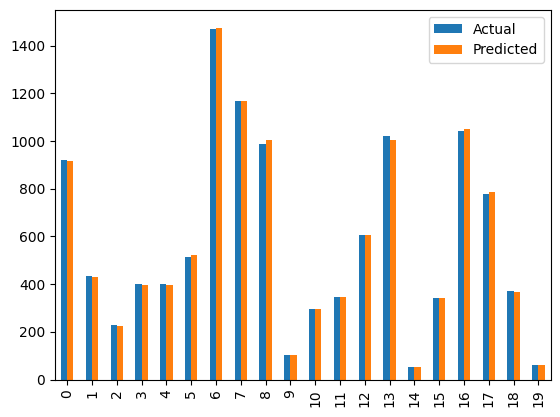

In [21]:
graph.plot(kind='bar')